### Задача о приведениии перевернутого маятника к положению, соответствующему нулевому углу, с использованием PID-controllers

Решим задачу о стабилизации перевернутого маятника с использованием ПИД-регуляторов

In [1]:
#подключим библиотеки
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

In [2]:
#структура параметров
class Parameters:
    def __init__(self, m, g, l, M):
        self.m = m
        self.g = g
        self.l = l
        self.M = M

In [3]:
#схема Рунге-Кутта 4 порядка
def Runge(f,y_0,t):       
    y = np.zeros((n,len(y_0)))
    y[0] = np.copy(y_0)
    for i in range(1,n):
        F = controlF(y[:i,2],h)
        k_1 = f(t[i-1],y[i-1],F)
        k_2 = f(t[i-1]+0.5*h,y[i-1]+0.5*h*k_1,F)
        k_3 = f(t[i-1]+0.5*h,y[i-1]+0.5*h*k_2,F)
        k_4 = f(t[i-1]+h,y[i-1]+h*k_3,F)
        y[i] = y[i-1] +h * (k_1 + 2*k_2+2*k_3+k_4)/6
    x = np.zeros(n)
    z = np.zeros(n) 
    for i in range(n):
        x[i] = y[i][0]
        z[i] = y[i][2]
    return x,z

In [4]:
#уравнения движения системы "маятник-тележка"
#здесь x[1], x[2], x[3] - смещение тележки относительно 0, угол отклонения маятника от нормали к пов-ти, производная угла
def f(t,x,F):
    dxdt = np.zeros(len(x))
    dxdt[0] = x[1]
    dxdt[1] = (-p.m*p.g*np.cos(x[2])*np.sin(x[2])+p.m*p.l*np.sin(x[2])*(x[3])**2 + F)/(p.M+p.m*(np.sin(x[2]))**2)
    dxdt[2] = x[3]
    dxdt[3] = (-p.m*p.l*np.cos(x[2])*np.sin(x[2])*(x[3])**2-np.cos(x[2])*F + (p.M + p.m)*p.g*np.sin(x[2]))/(p.M*p.l+p.m*p.l*(np.sin(x[2]))**2)
    return dxdt

In [5]:
#3ададим параметры и начальные значения
p = Parameters(0.1, 9.8, 1, 0.5) #(m, g, l, M)
t0 = 0
tf = 2.5
numt = 200
P,I,D = 25, 15, 3
t = np.linspace(t0,tf,numt)
h = t[1]-t[0]
n = len(t)
init_val = [0,0,0.5,0]

In [6]:
def controlF(phi,h):
    if(len(phi) == 1):
        return P*phi[-1]
    else:
        return P*phi[-1] + I * np.trapz(phi,dx=h) + D * (phi[-1]-phi[-2])/h

Получим численное решение для смещения тележки и угла отклонения

In [7]:
x,phi = Runge(lambda x,y,t : f(x,y,t), np.array(init_val),t)

Посчитаем управляющую силу, используя формулу из Википедии \
$F(t) = P\cdot\theta(t) + I\cdot\int_0^{t}\theta(t)d\tau + D\cdot\frac{d\theta(t)}{dt}$

Здесь $P, I, D$ - коэффициенты при пропорциональной, интегральной и дифференциальной компонентах \
(https://en.wikipedia.org/wiki/PID_controller)

In [8]:
F = []
for i in range(n):
    if(i!=0):
        F.append(P*phi[i] + I*np.trapz(phi[:i],dx=h) + D*(phi[i]-phi[i-1])/h)
    else:
        F.append(P*phi[i])

Нарисуем графики

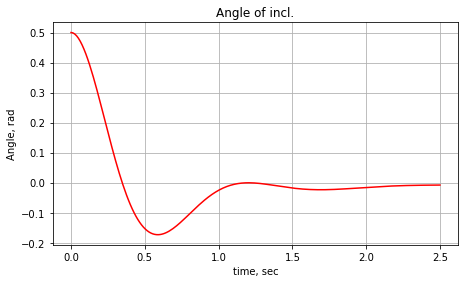

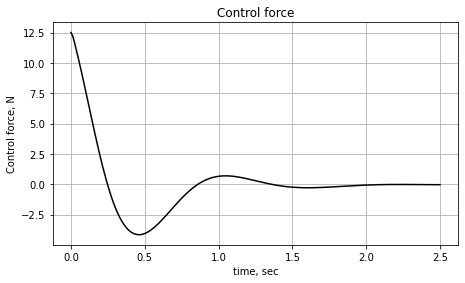

In [9]:
plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 1)

plt.plot(t,phi,'r')
plt.ylabel('Angle, rad')
plt.xlabel('time, sec')
plt.title('Angle of incl.')
plt.grid()

plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 2)
plt.plot(t,F,'k')
plt.ylabel('Control force, N')
plt.xlabel('time, sec')
plt.title('Control force')
plt.grid()
plt.show()

Сломаем жопу и составим анимацию движения системы "маятник-тележка"

MovieWriter imagemagick unavailable; using Pillow instead.


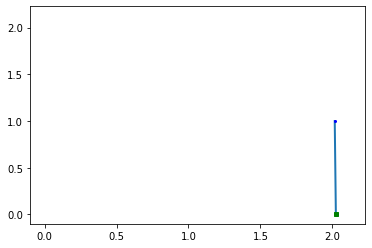

In [10]:
fig = plt.figure()
ax = plt.axes(xlim=(-0.1, 1.1*max(x)), ylim=(-0.1, 1.1*max(x)))
line, = ax.plot([], [], lw=2)

B = [x[0]+p.l*np.sin(phi[0]), p.l*np.cos(phi[0])]
C = [x[0],0]
ball, = ax.plot(B[0],B[1], color = 'blue', marker = 'o',  ms = 2)
cart, = ax.plot(C[0], C[1], color = 'green', marker = 's',  ms = 4)

def animate(i):
    B = [x[i]+p.l*np.sin(phi[i]), p.l*np.cos(phi[i])]
    C = [x[i],0]
    x1 = [C[0],B[0]]
    y1 = [C[1],B[1]]
    line.set_data(x1, y1)
    ball.set_data(B[0], B[1])
    cart.set_data(C[0], C[1])
    return line, ball

anim = FuncAnimation(fig, animate, frames=n, interval=1, blit=True)

anim.save('pend19_(0.1,9.8,1,0.5)1.gif', writer='imagemagick')

Здесь $M = 0.1, g = 9.8, l = 1, m = 0.5$

In [11]:
Image(url='pend19_(0.1,9.8,1,0.5).gif')

Здесь $M = 1, g = 9.8, l = 0.3, m = 0.3$

In [12]:
Image(url='pend17_original_initials.gif')

Based on "Simulation studies of inverted pendulum based on PID controllers" by Jia-Jun Wang, 2011